Μπεκιάρης Χαράλαμπος

Σχολή ΕΜΦΕ

Α.Μ.: ge18088


# Παραδοτέο 1
## Ερώτημα α)

In [18]:
import random
from numpy import random
from math import gamma, pi 
random.seed(2017) # Generates better results

def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    return 2 ** d * nhits / N

def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

######################################

N = 1_000_000
d = 2
p,e = [], []

while True:
    v_est = vol(N,d)
    if v_est == 0: break # Nhits equals 0
    v_act = Vol1(d)
    err = 100*abs(1 - v_est/v_act)
    #print((d,v_act,v_est,err))
    p.append(v_act/2**d)
    e.append(err)
    
    d += 1    

## Ερώτημα β)

<Figure size 720x432 with 0 Axes>

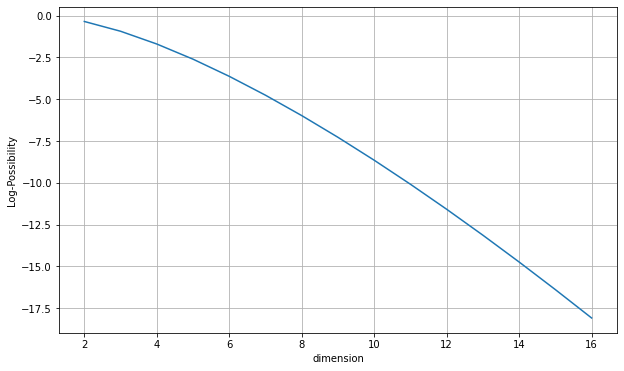

<Figure size 720x432 with 0 Axes>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

x = [i for i in range(2,d)]
y = np.log2(p)
plt.plot(x, y)
plt.xlabel('dimension')
plt.ylabel('Log-Possibility')
plt.grid(True)
plt.figure()

Παρατηρούμε ότι η σχέση που συνδέει τα μεγέθη $d-log(p(d))$ είναι γραμμική και φθίνει καθώς αυξάνεται η διάσταση $d$. 

<Figure size 720x432 with 0 Axes>

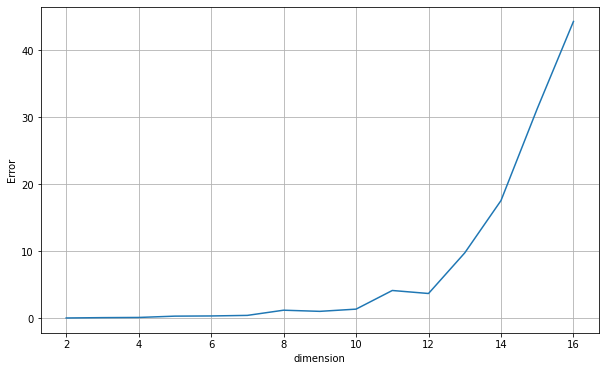

<Figure size 720x432 with 0 Axes>

In [23]:
plt.plot(x, e)
plt.xlabel('dimension')
plt.ylabel('Error')
plt.grid(True)
plt.figure()

Το σχετικό σφάλμα φαίνεται να έχει εκθετική αύξηση καθώς μεγαλώνει η διάσταση. Αυτό οφείλεται στο γεγονός ότι ενώ αυξάνουμε την διάσταση $d$, το πλήθος των σημείων που επιλέγουμε παραμένει σταθερό, άρα τα σημεία αυτά γίνονται ολοένα και πιο αραιά και σε συνδιασμό με την πιθανότητα που φθίνει εκθετικά, έχουμε μία μη ικανοποιητική προσέγγιση. Δηλαδή αυτό που συμβαίνει είναι τα σημεία να πέφτουν με μεγάλη πιθανότητα εκτός της μοναδιαίας σφαίρας, άρα όντως είναι σαν να συγκεντρώνονται στις "γωνίες".

## Ερώτημα γ)

In [24]:
print(Vol1(20)/(2**20))  

2.461136950494199e-08


Η πιθανότητα ένα σημείο να πέσει μέσα στην μοναδιαία σφαίρα 20 διαστάσεων είναι $p≈2.46 * 10^{-8}$. 

To πρόβλημα που έχουμε μπορεί να περιγραφεί από μία Μαρκοβιανή Αλυσίδα που κινείται στον χώρο καταστάσεων $Χ= \{ 0,1,2,.....,1000 \} $ με πιθανότητα $p(n,n+1)=p$  &  $p(n,n)=1-p$.

Ο χώρος καταστάσεων περιγράφει πόσα σημεία έχουν πέσει μέσα στην μοναδιαία σφαίρα. Προφανώς η κατάσταση $Χ=1000$ είναι απορροφητική και $p(1000,1000)=1$.

Λύνουμε το αντίστοιχο ΠΣΤ και υπολογίζουμε την 
$$
g(0)= E[T_{1000}<+∞|X_{0}=0]
$$

In [3]:
from numpy import random as r
from timeit import timeit

def fun(req_nhits,d):
    nhits = 0
    N = 0
    while nhits < req_nhits:
        x = r.uniform(-1,1,d)
        if sum(x**2)<1: 
            nhits+=1
        N += 1
    return N
    
t = timeit("fun(1000,20)", setup="from __main__ import fun", number=1)
print(t)

KeyboardInterrupt: 

Μία τροποποίηση του παραπάνω αλγορίθμου ώστε να βρίσκει 1000 σημεία μέσα στην μπάλα 15-διαστάσεων χρειάστηκε 438 δευτερόλεπτα ή 7 λεπτά και 18 δευτερόλεπτα. Καθώς η πιθανότητα μειώνεται εκθετικά όσο αυξάνεται η διάσταση, είναι αδύνατο να περιμένει κανείς να τερματίσει ο αλγόριθμος στις 20 διαστάσεις.

# Παραδοτέο 2
## Ερώτημα α)

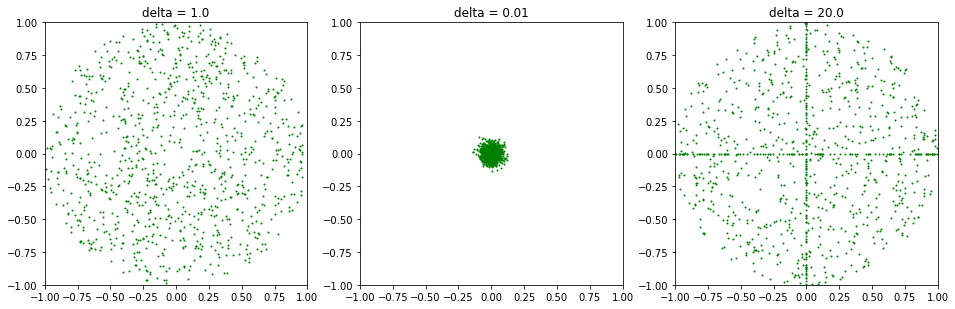

In [5]:
import random as r
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)


delta = [1.0,0.01,20.0]
N = 100 # number of steps to approach equilibrium
samples = 1000 


for i in range(3):
    d = delta[i]
    point_x = []
    point_y = []
    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice([0,1])  ## choose a jump direction at random
            z = r.uniform(-d,d) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump

        point_x.append(x[0])
        point_y.append(x[1])
        
    ax = plt.subplot(1, 3, i+1)
    plt.scatter(point_x, point_y, color = 'green', s = 1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal')  # set aspect ratio 1:1
    plt.title("delta = {}".format(d))

plt.show()

Όταν το δέλτα είναι πολύ μεγάλο ο λόγος των εμβαδόν του μοναδιαίου δίσκου με του τετραγώνου με πλευρά 20, είναι πολύ μικρός, επομένως η πιθανότητα τα σημεία να πέσουν μέσα στον δίσκο είναι πολύ μικρή, γι'αυτό φαίνεται να είναι πιο αραιό το scatter plot. Επίσης φαίνεται ότι αρκετά σημεία έχουν τετμημένη ή τεταγμένη πάνω στην μέση τιμή $μ=0$. Επομένως τα σημεία δεν φαίνεται ότι είναι ομοιόμορφα επιλεγμένα μέσα στον μοναδιαίο δίσκο, καθώς η αλυσίδα δεν έχε κάνει αρκετά βήματα για να φτάσει σε ισορροπία.

Για μικρό δέλτα καθώς η αλυσίδα απομακρύνεται από το $(0,0)$, φθίνει η πιθανότητα να απομακρυνθεί ακόμα περισσότερο καθώς θα χρειάζοταν παραπάνω βήματα προς την ίδια κατεύθυνση. Επίσης το πρόβλημα είναι όμοιο με αυτό του συμμετρικού περιπάτου για κάθε συνιστώσα, όπου το κέντρο $0$ αναμένουμε να έχει τον μεγαλύτερο αριθμό επισκέψεων. Επομένως και πάλι δεν παίρνουμε στο αποτέλεσμα τα σημεία ομοιόμορφα απλωμένα στον δίσκο.


## Ερώτημα β)

Με την μέθοδο MCMC επιλέγουμε ομοιόμορφα ένα σημείο $x = (x_1,x_2,...,x_d)$ στην μοναδιαία μπάλα $D_d$ και στην συνέχεια επιλέγουμε ομοιόμορφα στο $[-1,1]$  μία ακόμη συνιστώσα $x_{d+1}$, επομένως το σημείο $x$ θα ανήκει πλέον στον κύλινδρο $C_{d+1}$. Συνολικά θα έχουμε πλήθος  σημείων στον κύλινδρο, όσο το $samples$. Τέλος ελέγχουμε αν το σημείο του κυλίνδρου είναι επίσης σημείο της μπάλας $D_{d+1}$, και ανάλογα αυξάνουμε το $Nhits$ κατά 1. Επομένως :

$$
\frac{Nhits}{samples}≈\frac{|D_{d+1}|}{|C_{d+1}|}= \frac{|D_{d+1}|}{2|D_{d}|}⇒|D_{d+1}|=\frac{Nhits}{samples} * 2 * |D_d|
$$

In [1]:
from math import pi, gamma
from numpy import random as r
from numpy import array

def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)
######################################

delta = 1.0
N = 100 # number of steps to approach equilibrium
samples = 10000
V_old = 2 # 1-D ball Volume
for d in range(1,100):
    Nhits = 0
    
    for _ in range(samples):
        x = [0 for _ in range(d)]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice(range(d))  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        
        x.append(r.uniform(-1,1)) ## Choose a new component randomly between[-1,1] and append it
        if sum(array(x)**2) <1: Nhits +=1 ## Check if the new point is inside the d+1 dimension-unitary sphere 
            
    V_new = Nhits/samples * 2 * V_old
    V_old = V_new
    V_act = Vol1(d+1)
    err = 100*abs(1-V_new/V_act)
    print("{}-dimensions unitary sphere volume\nEst.: {:.5}\nAct.: {:.5}\nErr.: {:.5}%\n".format(d+1,V_new,V_act,err))

2-dimensions unitary sphere volume
Est.: 3.1732
Act.: 3.1416
Err.: 1.0061%

3-dimensions unitary sphere volume
Est.: 4.2534
Act.: 4.1888
Err.: 1.5414%

4-dimensions unitary sphere volume
Est.: 5.0317
Act.: 4.9348
Err.: 1.964%

5-dimensions unitary sphere volume
Est.: 5.3538
Act.: 5.2638
Err.: 1.7091%

6-dimensions unitary sphere volume
Est.: 5.2242
Act.: 5.1677
Err.: 1.0929%

7-dimensions unitary sphere volume
Est.: 4.776
Act.: 4.7248
Err.: 1.0834%

8-dimensions unitary sphere volume
Est.: 4.1159
Act.: 4.0587
Err.: 1.4095%

9-dimensions unitary sphere volume
Est.: 3.4113
Act.: 3.2985
Err.: 3.4186%

10-dimensions unitary sphere volume
Est.: 2.6778
Act.: 2.5502
Err.: 5.0069%

11-dimensions unitary sphere volume
Est.: 2.0127
Act.: 1.8841
Err.: 6.8238%

12-dimensions unitary sphere volume
Est.: 1.4379
Act.: 1.3353
Err.: 7.6831%

13-dimensions unitary sphere volume
Est.: 0.94524
Act.: 0.91063
Err.: 3.8013%

14-dimensions unitary sphere volume
Est.: 0.6146
Act.: 0.59926
Err.: 2.5587%

15-dim